# Desafio Gerado pelo chat GPT
> Objetivo:
>> Carregar a Planilha: Carregar a planilha usando pandas e openpyxl.
> Análise dos Dados:
>> Calcular o total de vendas por mês.
>> Identificar o SKU mais vendido em cada mês.
>> Calcular a quantidade total vendida para cada SKU ao longo do período.
>> Exportar os resultados para uma nova planilha Excel

In [33]:
import pandas as pd
import openpyxl 
import numpy as np
import seaborn as sns
import matplotlib as plot

In [55]:
# lendo o arquivo  com o pandas

base_vendas_df = pd.read_excel('Base Vendas - 2022.xlsx')
base_vendas_df.head(10)

,Data da Venda,Ordem de Compra,SKU,ID Cliente,Qtd Vendida,ID Loja
0,2022-01-01,SO61285,HL216,23791,2,166
1,2022-01-01,SO61285,HL1,23791,1,93
2,2022-01-01,SO61285,HL227,23791,1,94
3,2022-01-01,SO61301,HL216,16747,2,17
4,2022-01-01,SO61301,HL89,16747,1,115
5,2022-01-01,SO61301,HL227,16747,1,95
6,2022-01-01,SO61269,HL2,11792,1,87
7,2022-01-01,SO61269,HL8,11792,1,183
8,2022-01-01,SO61286,HL215,11530,2,72
9,2022-01-01,SO61286,HL223,11530,2,131


In [35]:
#verifica se tem valores nulos
base_vendas_df.isnull().any()

Data da Venda      False
Ordem de Compra    False
SKU                False
ID Cliente         False
Qtd Vendida        False
ID Loja            False
dtype: bool

In [57]:
# renomear as colunas 
base_vendas_df = base_vendas_df.rename(columns={'Data da Venda':'data_da_venda', 'Ordem de Compra': 'ordem_de_compra', 'ID Cliente':'id_cliente', 'Qtd Vendida': 'qtd_vendida', 'ID Loja':'id_loja'})
base_vendas_df.head()

,data_da_venda,ordem_de_compra,SKU,id_cliente,qtd_vendida,id_loja
0,2022-01-01,SO61285,HL216,23791,2,166
1,2022-01-01,SO61285,HL1,23791,1,93
2,2022-01-01,SO61285,HL227,23791,1,94
3,2022-01-01,SO61301,HL216,16747,2,17
4,2022-01-01,SO61301,HL89,16747,1,115


In [69]:
# mudando a data
try:
    base_vendas_df['data_da_venda'] = pd.to_datetime(base_vendas_df['data_da_venda'], dayfirst=True) # função que converte a coluna para o formato de data
    base_vendas_df['data_venda'] = base_vendas_df['data_da_venda'].dt.strftime('%m/%Y') # metodo para deixar no formato especifico de mês/ano
    base_vendas_df = base_vendas_df[['data_venda','ordem_de_compra','SKU','id_cliente','qtd_vendida','id_loja']] # sleciona só as coulunas de interesse
except KeyError:
    print('A data já foi modificada')

base_vendas_df

A data já foi modificada


,data_venda,ordem_de_compra,SKU,id_cliente,qtd_vendida,id_loja
0,01/2022,SO61285,HL216,23791,2,166
1,01/2022,SO61285,HL1,23791,1,93
2,01/2022,SO61285,HL227,23791,1,94
3,01/2022,SO61301,HL216,16747,2,17
4,01/2022,SO61301,HL89,16747,1,115
...,...,...,...,...,...,...
29476,06/2022,SO74143,HL164,28517,2,38
29477,06/2022,SO74143,HL166,28517,1,145
29478,06/2022,SO74143,HL293,28517,1,171
29479,06/2022,SO74124,HL167,21676,2,80


# Analise do SKU

In [70]:
# 10 sku mais vendidos no total
vendas_sku_df = base_vendas_df[['SKU', 'qtd_vendida']]
sku_df = vendas_sku_df.groupby('SKU').agg('sum').reset_index(drop=False).sort_values(by='qtd_vendida', ascending=False).head(10).reset_index(drop=True)
sku_df

,SKU,qtd_vendida
0,HL164,4565
1,HL167,3255
2,HL215,3121
3,HL6,2394
4,HL216,2379
5,HL172,2222
6,HL165,2190
7,HL166,1943
8,HL217,1572
9,HL1,1218


<Axes: xlabel='SKU', ylabel='qtd_vendida'>

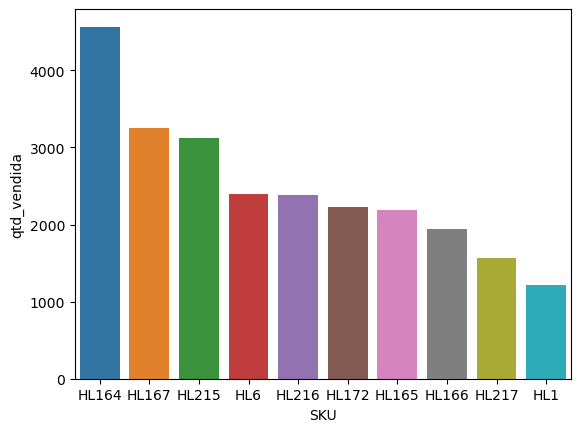

In [71]:
sns.barplot(data=sku_df, x='SKU', y='qtd_vendida')

In [32]:
base_vendas_df

,data_venda,ordem_de_compra,SKU,id_cliente,qtd_vendida,id_loja
0,01/2022,SO61285,HL216,23791,2,166
1,01/2022,SO61285,HL1,23791,1,93
2,01/2022,SO61285,HL227,23791,1,94
3,01/2022,SO61301,HL216,16747,2,17
4,01/2022,SO61301,HL89,16747,1,115
...,...,...,...,...,...,...
29476,06/2022,SO74143,HL164,28517,2,38
29477,06/2022,SO74143,HL166,28517,1,145
29478,06/2022,SO74143,HL293,28517,1,171
29479,06/2022,SO74124,HL167,21676,2,80


In [7]:
# Resolver o problema da data
vendas_janeiro_df = base_vendas_df.query('data_da_venda == "2022-01-20"')
vendas_janeiro_df.shape

(195, 6)